<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Practical 7 - Using Word Embedding</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.2.4-tf


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


## Objectives
After completing this practical exercise, students should be able to:
1. [Understand how to use word embeddings](#word)
    * [Exercise One](#exc1)
    
    
2. [Understand how to use pre-trained word embeddings](#pretrained)
    * [Exercise Two](#exc2)

## 1. Using word embeddings  <a id='word' />



### 1.1 Learning word embeddings with the `Embedding` layer


In [3]:
from tensorflow.keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 8.
embedding_layer = Embedding(1000, 8)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



The `Embedding` layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. 

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# Number of words to consider as features = number of vocabulary
max_features = 10000
# Cut the review sequence after this number of words 
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
# number of words in one sequence
print('The 1st sample has', len(x_train[0]), 'words.')
print(x_train[0])

The 1st sample has 218 words.
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
# Sequences shorter than maxlen be padded with zeros
# Sequences longer than maxlen be truncated, default truncating ='pre'
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, truncating ='pre')
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen, truncating ='pre')

In [7]:
print(x_train[0])

[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(max_features, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 151us/sample - loss: 0.6791 - acc: 0.5956 - val_loss: 0.6490 - val_acc: 0.6730
Epoch 2/10
20000/2

We get to a validation accuracy of ~75%, which is pretty good considering that we only look at the last 20 words in every review. 

### 1.2 Exercise One  <a id='exc1' />
Please try below two scenerios, make changes on the the dimensionality of the embeddings or number of words. 

**Scenerio A**:
* Decrease the the dimensionality of the embeddings from 8 to 4

**Scenerio B**:
* Increase the max length (i.e max number of words per review) from 20 to 100

Observe the training and validation accuracy curves for the both scenerios. 

Provide your codes & observations in the below code boxes & markdown boxes respectively.


#### Scenerio A: 

In [1]:
# Task 1: Download the data and preprocess the data
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# Number of words to consider as features = number of vocabulary
max_features = 10000
# Cut the review sequence after this number of words 
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)




from tensorflow.keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 8.
embedding_layer = Embedding(1000, 4)


# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
# Sequences shorter than maxlen be padded with zeros
# Sequences longer than maxlen be truncated, default truncating ='pre'
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, truncating ='pre')
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen, truncating ='pre')

In [2]:
# Task 2: Build the Model
# Remember to decrease the dimensionality of embedding layer from 8 to 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(max_features, 4, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 4)             40000     
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 40,081
Trainable params: 40,081
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Task 3: Compile and Fit the Model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 3s 140us/sample - loss: 0.6744 - acc: 0.6198 - val_loss: 0.6345 - val_acc: 0.6958
Epoch 2/10
20000/20000 [==============================] - 2s 89us/sample - loss: 0.5667 - acc: 0.7420 - val_loss: 0.5411 - val_acc: 0.7220
Epoch 3/10
20000/20000 [==============================] - 2s 98us/sample - loss: 0.4861 - acc: 0.7732 - val_loss: 0.5086 - val_acc: 0.7438
Epoch 4/10
20000/20000 [==============================] - 2s 89us/sample - loss: 0.4481 - acc: 0.7924 - val_loss: 0.4971 - val_acc: 0.7460
Epoch 5/10
20000/20000 [==============================] - 2s 96us/sample - loss: 0.4261 - acc: 0.8041 - val_loss: 0.4931 - val_acc: 0.7548
Epoch 6/10
20000/20000 [==============================] - 2s 109us/sample - loss: 0.4106 - acc: 0.8130 - val_loss: 0.4936 - val_acc: 0.7562
Epoch 7/10
20000/20000 [==============================] - 2s 119us/

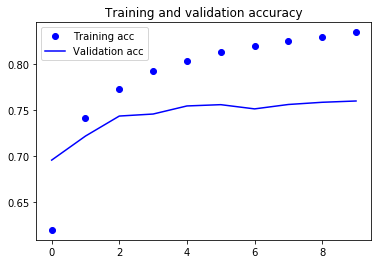

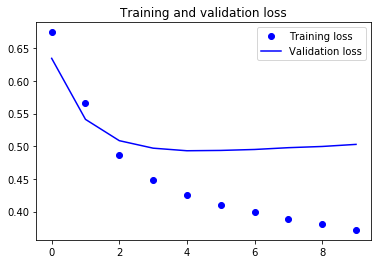

In [5]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Task 4: Comment on the model performance

# starts to overfit after approximately 3 epochs

#### Scenerio B

In [17]:
# Task 1: Download the data and preprocess the data
# Remember to increase the maxlen from 20 to 100
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# Number of words to consider as features = number of vocabulary
max_features = 10000
# Cut the review sequence after this number of words 
maxlen = 100

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)




from tensorflow.keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 8.
embedding_layer = Embedding(1000, 8)


# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
# Sequences shorter than maxlen be padded with zeros
# Sequences longer than maxlen be truncated, default truncating ='pre'
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, truncating ='pre')
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen, truncating ='pre')

In [18]:
# Task 2: Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(max_features, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Task 3: Compile and Fit the Model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 148us/sample - loss: 0.6113 - acc: 0.6913 - val_loss: 0.4600 - val_acc: 0.8060
Epoch 2/10
20000/20000 [==============================] - 3s 128us/sample - loss: 0.3657 - acc: 0.8530 - val_loss: 0.3491 - val_acc: 0.8492
Epoch 3/10
20000/20000 [==============================] - 3s 129us/sample - loss: 0.2871 - acc: 0.8838 - val_loss: 0.3273 - val_acc: 0.8578
Epoch 4/10
20000/20000 [==============================] - 2s 117us/sample - loss: 0.2515 - acc: 0.8986 - val_loss: 0.3242 - val_acc: 0.8600
Epoch 5/10
20000/20000 [==============================] - 3s 133us/sample - loss: 0.2281 - acc: 0.9108 - val_loss: 0.3236 - val_acc: 0.8618
Epoch 6/10
20000/20000 [==============================] - 3s 145us/sample - loss: 0.2097 - acc: 0.9179 - val_loss: 0.3327 - val_acc: 0.8608
Epoch 7/10
20000/20000 [==============================] - 3s 140us/sample - loss: 0.1933 - acc: 0.9259 - val_lo

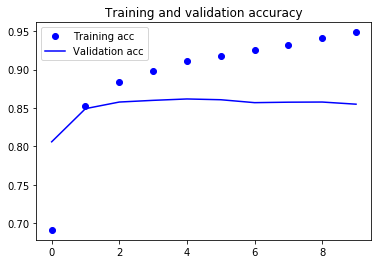

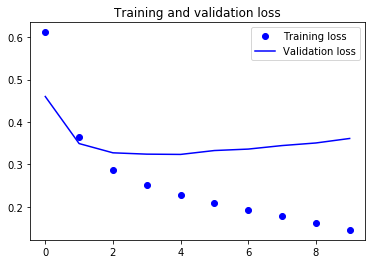

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Task 4: Comment on the model performance

# starts to overfit after approximately 3 epochs

## 2. Using pre-trained word embeddings  <a id='pretrained'/>

### 2.1 Download the IMDB data as raw text

First, download the raw IMDB dataset - aclImdb.zip from MeL (source from `http://ai.stanford.edu/~amaas/data/sentiment/`). De-compress it and save it in your DL folder. After that, assign the directory to imdb_dir as shown below.

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels (positive / negative) into a `labels` list:

In [29]:
import os

imdb_dir = 'C:\\DL_Notebk\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt': 
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [30]:
print(texts[0])
print(len(texts[0]))

Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
655


In [31]:
print(labels[0])

0


In [32]:
print(len(texts))

25000


### 2.2 Tokenize the data

Let's vectorize the texts we collected, and prepare a training and validation split.
We will merely be using the concepts we introduced earlier in this section.



In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 20  # We will cut reviews after 20 words
training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 10000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 20)
Shape of label tensor: (25000,)


In [34]:
print(x_train[0])
print(len(x_train[0]))

[4838  850 4058 3932 4753 3823   39   98    4    1 1982  105 1476   10
 1652  720 6700 5712  112  780]
20


In [35]:
print(len(x_train))
print(len(x_val))

20000
5000


### 2.3 Download the GloVe word embeddings

Head to `https://nlp.stanford.edu/projects/glove/`and download the pre-computed embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing multiple txt files with different dimension of embeddings (50, 100, 200 and 300). In this practice we will use `glove.6B.50b.txt` for embedding, i.e. we will convert each word index into a vector of 100 elements / numbers. Please Un-zip the file, save `glove.6B` folder in your data folder and pass the directory path to glove_dir.

In [36]:
glove_dir = 'C:\\DL_Notebk\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index (built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [37]:
embedding_dim = 50

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [38]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 [ 0.26818001  0.14346001 -0.27877    ... -0.63209999 -0.25027999
  -0.38097   ]
 ...
 [ 0.080631    0.42407    -0.80875999 ... -0.094323   -0.3558
  -0.57837999]
 [ 0.55150998 -0.55568999 -0.74370998 ...  0.63006002 -0.49641001
   0.2423    ]
 [-0.36245999  0.80723    -0.1154     ... -0.070781    0.17387
  -0.22424001]]


### 2.4 Define a model

We will be using the same model architecture as before:

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32032     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 532,065
Trainable params: 532,065
Non-trainable params: 0
_________________________________________________________________


### 2.4 Load the GloVe embeddings in the model
The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

In [40]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32032     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 532,065
Trainable params: 32,065
Non-trainable params: 500,000
_________________________________________________________________


### 2.5 Train and evaluate

Let's compile our model and train it:

In [42]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 63us/sample - loss: 0.6575 - acc: 0.6082 - val_loss: 0.6274 - val_acc: 0.6446
Epoch 2/10
20000/20000 [==============================] - 1s 50us/sample - loss: 0.6083 - acc: 0.6648 - val_loss: 0.6228 - val_acc: 0.6418
Epoch 3/10
20000/20000 [==============================] - 1s 49us/sample - loss: 0.5764 - acc: 0.6955 - val_loss: 0.6165 - val_acc: 0.6546
Epoch 4/10
20000/20000 [==============================] - 1s 46us/sample - loss: 0.5363 - acc: 0.7241 - val_loss: 0.6494 - val_acc: 0.6440
Epoch 5/10
20000/20000 [==============================] - 1s 44us/sample - loss: 0.4961 - acc: 0.7534 - val_loss: 0.6748 - val_acc: 0.6388
Epoch 6/10
20000/20000 [==============================] - 1s 48us/sample - loss: 0.4525 - acc: 0.7847 - val_loss: 0.6666 - val_acc: 0.6522
Epoch 7/10
20000/20000 [==============================] - 1s 46us/sample - loss: 0.4077 - acc: 0.8127 - val_loss: 0.7

In [31]:
model.save_weights('pre_trained_glove_model.h5')

Let's plot its performance over time:

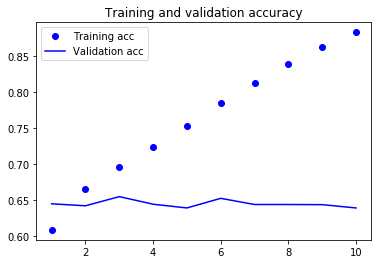

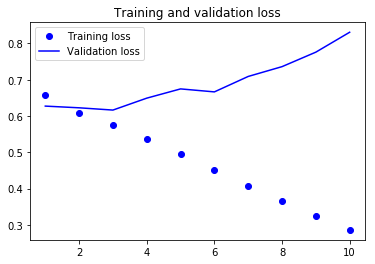

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model also quickly overfits and only achieve around 65% validation accuracy, much lower than the 75% validation accuracy we achieved earlier by training our own embedding layer. The reason is that when we have a lot of data (e.g. 20,000 training samples in this case), through training our own embedding layer using the specific training samples, we would be learning a task-specific embedding for our own problem, which is generally more powerful than pre-trained word embeddings. 

In the below Practice, you will be required to unfreeze the pre-trained embedding layer and observe what is happening. 

### 2.6 Exercise Two <a id='exc2' />

Please **unfreeze the pre-trained embedding layer** and train your model accordingly. The objective is to maximize the validation accuracy. 

While you are training the model, you may need to utilize the below tecniques to regularizing your model to avoid overfitting. 
* Add dropout
* Try different architectures: add or remove layers, increase or decrease the number of units per layer
* Add L1 and / or L2 regularization
* Adjust the hyperparameters, e.g. the learning rate of the optimizer, the number of epochs, batch_size and etc.

Provide your codes and comments in the below boxes.

In [63]:
# Task 1: Build the Model
# Remember to set the embedding layer as a trainable layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))
model.summary()


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 20, 50)            500000    
_________________________________________________________________
flatten_8 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                64064     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total para

In [64]:
# Task 2: Compile and Fit the Model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 235us/sample - loss: 0.9702 - acc: 0.5143 - val_loss: 0.6939 - val_acc: 0.6024
Epoch 2/10
20000/20000 [==============================] - 5s 237us/sample - loss: 0.6914 - acc: 0.5912 - val_loss: 0.6460 - val_acc: 0.6956
Epoch 3/10
20000/20000 [==============================] - 4s 220us/sample - loss: 0.6612 - acc: 0.6772 - val_loss: 0.6015 - val_acc: 0.7332
Epoch 4/10
20000/20000 [==============================] - 4s 215us/sample - loss: 0.6353 - acc: 0.7091 - val_loss: 0.6050 - val_acc: 0.7422
Epoch 5/10
20000/20000 [==============================] - 4s 218us/sample - loss: 0.6215 - acc: 0.7235 - val_loss: 0.5815 - val_acc: 0.7500
Epoch 6/10
20000/20000 [==============================] - 5s 226us/sample - loss: 0.6066 - acc: 0.7437 - val_loss: 0.5717 - val_acc: 0.7516
Epoch 7/10
20000/20000 [==============================] - 5s 256us/sample - loss: 0.5939 - acc: 0.7517 - val_lo

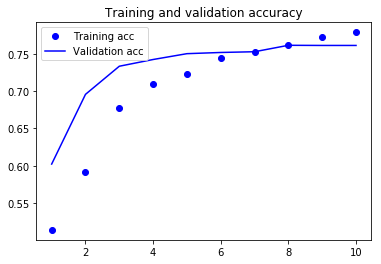

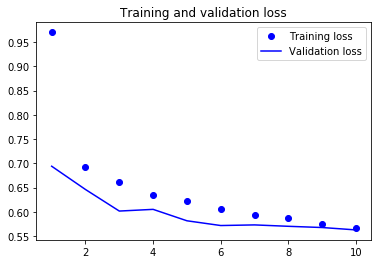

In [65]:
# Task 3: Plot training and validation acc & loss curves 
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Task 4: Comment on Model Performance
# Added another dense layer of 64 nodes
# Added regularization for both dense layers
# Added dropout of 0.75 and 0.5
# Model achieved has slight lower acc than previous models but validation accuracy is slightly increased as well, making a good fit.
